In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Model

!pip install opencv-python matplotlib

In [3]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline



pip install scikit-image

In [4]:
from tqdm import tqdm_notebook, tnrange
from itertools import chain
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from sklearn.model_selection import train_test_split

In [6]:
# from tensorflow.keras.models import Model, load_model
# from tensorflow.keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
# from tensorflow.keras.layers.core import Lambda, RepeatVector, Reshape
# from tensorflow.keras.layers.convolutional import Conv2D, Conv2DTranspose
# from tensorflow.keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
# from tensorflow.keras.layers.merge import concatenate, add
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [11]:
import keras

In [12]:
from tensorflow.keras.layers import Dense

In [15]:
from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
# from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers import Lambda, RepeatVector, Reshape
# from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers import Conv2D, Conv2DTranspose
from keras.layers import MaxPooling2D, GlobalMaxPool2D
from tensorflow.keras.layers import concatenate, add
# from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from tensorflow.keras.utils import img_to_array, img_to_array, load_img
# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator

!pip install plotly

!pip install seaborn

In [16]:
import cv2
import PIL
import plotly.express as px
import seaborn as sns
import glob
import random
import sys

In [17]:
from os import listdir

In [18]:
random.seed(100)
np.random.seed(100)

In [19]:
print(os.getcwd())
print(sys.argv[0])
print(os.path.dirname(os.path.realpath('__file__')))

/Users/gryffindorgirl/Desktop/Internship
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow2/lib/python3.10/site-packages/ipykernel_launcher.py
/Users/gryffindorgirl/Desktop/Internship


In [104]:
absolute_path = os.path.dirname(os.path.realpath('__file__'))
relative_path = "Kaggel_dataset/csv/mass_case_description_train_set.csv"
full_path = os.path.join(absolute_path, relative_path)
# full_path = "../Kaggel_dataset/mass_case_description_train_set.csv"
csv_mass = pd.read_csv(full_path)

In [105]:
absolute_path = os.path.dirname(os.path.realpath('__file__'))
relative_path = "Kaggel_dataset/csv/mass_case_description_test_set.csv"
full_path = os.path.join(absolute_path, relative_path)
# full_path = "../Kaggel_dataset/mass_case_description_train_set.csv"
csv_mass_test = pd.read_csv(full_path)

In [106]:
csv_mass.head(1)

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...


In [107]:
csv_mass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

In [108]:
# cropped_images=dicom_data[dicom_data.SeriesDescription == 'cropped images'].image_path

In [109]:
csv_mass_test["cropped image file path"]

0      Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1      Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....
2      Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...
3      Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....
4      Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....
                             ...                        
373    Mass-Test_P_01825_RIGHT_MLO_1/1.3.6.1.4.1.9590...
374    Mass-Test_P_01833_RIGHT_MLO_1/1.3.6.1.4.1.9590...
375    Mass-Test_P_01865_LEFT_MLO_1/1.3.6.1.4.1.9590....
376    Mass-Test_P_01912_RIGHT_CC_1/1.3.6.1.4.1.9590....
377    Mass-Test_P_01912_RIGHT_MLO_1/1.3.6.1.4.1.9590...
Name: cropped image file path, Length: 378, dtype: object

In [110]:
csv_mass["cropped image file path"]

0       Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1       Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2       Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3       Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4       Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....
                              ...                        
1313    Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....
1314    Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...
1315    Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....
1316    Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...
1317    Mass-Training_P_02092_LEFT_MLO_1/1.3.6.1.4.1.9...
Name: cropped image file path, Length: 1318, dtype: object

In [111]:
full_mammogram_images = csv_mass_test["image file path"]

In [112]:
full_mammogram_images.info()

<class 'pandas.core.series.Series'>
RangeIndex: 378 entries, 0 to 377
Series name: image file path
Non-Null Count  Dtype 
--------------  ----- 
378 non-null    object
dtypes: object(1)
memory usage: 3.1+ KB


In [113]:
full_mammogram_images.shape

(378,)

In [114]:
full_mammogram_images

0      Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100...
1      Mass-Test_P_00016_LEFT_MLO/1.3.6.1.4.1.9590.10...
2      Mass-Test_P_00017_LEFT_CC/1.3.6.1.4.1.9590.100...
3      Mass-Test_P_00017_LEFT_MLO/1.3.6.1.4.1.9590.10...
4      Mass-Test_P_00032_RIGHT_CC/1.3.6.1.4.1.9590.10...
                             ...                        
373    Mass-Test_P_01825_RIGHT_MLO/1.3.6.1.4.1.9590.1...
374    Mass-Test_P_01833_RIGHT_MLO/1.3.6.1.4.1.9590.1...
375    Mass-Test_P_01865_LEFT_MLO/1.3.6.1.4.1.9590.10...
376    Mass-Test_P_01912_RIGHT_CC/1.3.6.1.4.1.9590.10...
377    Mass-Test_P_01912_RIGHT_MLO/1.3.6.1.4.1.9590.1...
Name: image file path, Length: 378, dtype: object

In [115]:
full_mammogram_images[0]

'Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.416403281812750683720028031170500130104/1.3.6.1.4.1.9590.100.1.2.245063149211255120613007755642780114172/000000.dcm'

In [116]:
# full_mammogram_images = full_mammogram_images.apply(lambda x: x.replace())

In [117]:
# separate roi and cropped
absolute_path = os.path.dirname(os.path.realpath('__file__'))
relative_path = "Kaggel_dataset/csv/dicom_info.csv"
full_path = os.path.join(absolute_path, relative_path)
# full_path = "../Kaggel_dataset/mass_case_description_train_set.csv"
dicom_data = pd.read_csv(full_path)

dicom_data

In [25]:
dicom_data

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.62798...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.627982...,NaN,8,8,BREAST,3744,20160503,134238.422,WSD,...,MATLAB,ROI mask images,1.3.6.1.4.1.9590.100.1.2.627982547125586065005...,1,0,ISO_IR 100,20170906.0,DDSM,1.3.6.1.4.1.9590.100.1.2.310901637111684385906...,91038.0
10233,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.82451...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.824512...,NaN,16,16,BREAST,3316,20160426,123905.617,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.824512568105677732346...,1,0,ISO_IR 100,20161004.0,DDSM,1.3.6.1.4.1.9590.100.1.2.246896536912401556922...,132704.0
10234,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24759...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.247594...,NaN,16,16,BREAST,2712,20160426,134551.632,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.247594800112988856209...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.150339554012064216510...,191922.0
10235,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.28513...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.285138...,NaN,8,8,BREAST,2736,20160426,110906.969,WSD,...,MATLAB,ROI mask images,1.3.6.1.4.1.9590.100.1.2.285138900913160236325...,1,0,ISO_IR 100,20160721.0,DDSM,1.3.6.1.4.1.9590.100.1.2.426769868613284096628...,83526.0


cropped_images=dicom_data[dicom_data.SeriesDescription == 'cropped images'].image_path
cropped_images.head()

ROI_mask_images=dicom_data[dicom_data.SeriesDescription == 'ROI mask images'].image_path
ROI_mask_images.head()

ROI_mask_images.head(1)

absolute_path = os.path.dirname(os.path.realpath('__file__'))
relative_path = "Kaggel_dataset/jpeg"

image_dir = os.path.join(absolute_path, relative_path)

cropped_images = cropped_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
cropped_images.head()

cropped_images[0]

cropped_images.shape

ROI_mask_images.shape

ROI_mask_images = ROI_mask_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
ROI_mask_images.head()

x = cropped_images[0]

x

res = [i for i in range(len(x)) if x.startswith("/", i)]
idx_start = res[7]+1
idx_start
folderName = x[0:idx_start]
print(folderName+"crop.jpg")

cropped_images[0]

cropped_images.info()

cropped_images.head()

cropped_mask_images_show = PIL.Image.open(x)
gray_img= cropped_mask_images_show.convert("L")
plt.imshow(gray_img, cmap='gray')

x

In [26]:
# /Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.217604153411239074219886186713568683212

dicom_data

full_images=dicom_data[dicom_data.SeriesDescription == 'full mammogram images'].image_path
full_images.head()

full_images = full_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
full_images.head()

for item in full_images.items():
    old_name = item[1]
    res = [i for i in range(len(item[1])) if item[1].startswith("/", i)]
    idx_start = res[7]+1
    folderName = item[1][0:idx_start]
    newFileName = "full.jpg";
    new_name = os.path.join(folderName, newFileName)
    if os.path.exists(old_name):
        os.rename(old_name, new_name)

for item in ROI_mask_images.items():
    old_name = item[1]
    res = [i for i in range(len(item[1])) if item[1].startswith("/", i)]
    idx_start = res[7]+1
    folderName = item[1][0:idx_start]
    newFileName = "roi.jpg";
    new_name = os.path.join(folderName, newFileName)
    if os.path.exists(old_name):
        os.rename(old_name, new_name)

for item in cropped_images.items():
    old_name = item[1]
    res = [i for i in range(len(item[1])) if item[1].startswith("/", i)]
    idx_start = res[7]+1
    folderName = item[1][0:idx_start]
    newFileName = "crop.jpg";
    new_name = os.path.join(folderName, newFileName)
    if os.path.exists(old_name):
        os.rename(old_name, new_name)


In [27]:
# absolute_path = os.path.dirname(os.path.realpath('__file__'))
# relative_path = "Hello/crop.jpg"
# full_path = os.path.join(absolute_path, relative_path)
# newFileName = "Hello/jeepers.jpg"
# new_name = os.path.join(absolute_path, newFileName)
# os.rename(full_path,new_name)

In [118]:
csv_mass_test.head(5)

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...
3,P_00017,2,LEFT,MLO,1,mass,ROUND,ILL_DEFINED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....
4,P_00032,3,RIGHT,CC,1,mass,ROUND,OBSCURED,0,BENIGN,2,Mass-Test_P_00032_RIGHT_CC/1.3.6.1.4.1.9590.10...,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....


In [119]:
csv_mass.head(5)

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


res = [i for i in range(len(x)) if x.startswith("/", i)]
idx_start = res[7]+1
idx_start
folderName = x[0:idx_start]
print(folderName+"crop.jpg")

In [120]:
csv_mass["image file path"]

0       Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...
1       Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...
2       Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...
3       Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...
4       Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...
                              ...                        
1313    Mass-Training_P_02033_RIGHT_MLO/1.3.6.1.4.1.95...
1314    Mass-Training_P_02079_RIGHT_CC/1.3.6.1.4.1.959...
1315    Mass-Training_P_02079_RIGHT_MLO/1.3.6.1.4.1.95...
1316    Mass-Training_P_02092_LEFT_CC/1.3.6.1.4.1.9590...
1317    Mass-Training_P_02092_LEFT_MLO/1.3.6.1.4.1.959...
Name: image file path, Length: 1318, dtype: object

In [121]:
full_mammo_images_paths_test = csv_mass_test["image file path"]

In [122]:
full_mammo_images_paths = csv_mass["image file path"]

In [123]:
full_mammo_images_paths_test

0      Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100...
1      Mass-Test_P_00016_LEFT_MLO/1.3.6.1.4.1.9590.10...
2      Mass-Test_P_00017_LEFT_CC/1.3.6.1.4.1.9590.100...
3      Mass-Test_P_00017_LEFT_MLO/1.3.6.1.4.1.9590.10...
4      Mass-Test_P_00032_RIGHT_CC/1.3.6.1.4.1.9590.10...
                             ...                        
373    Mass-Test_P_01825_RIGHT_MLO/1.3.6.1.4.1.9590.1...
374    Mass-Test_P_01833_RIGHT_MLO/1.3.6.1.4.1.9590.1...
375    Mass-Test_P_01865_LEFT_MLO/1.3.6.1.4.1.9590.10...
376    Mass-Test_P_01912_RIGHT_CC/1.3.6.1.4.1.9590.10...
377    Mass-Test_P_01912_RIGHT_MLO/1.3.6.1.4.1.9590.1...
Name: image file path, Length: 378, dtype: object

In [124]:
roi_images_paths_test = csv_mass_test["ROI mask file path"]

In [125]:
roi_images_paths = csv_mass["ROI mask file path"]

In [126]:
roi_images_paths_test

0      Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1      Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....
2      Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...
3      Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....
4      Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....
                             ...                        
373    Mass-Test_P_01825_RIGHT_MLO_1/1.3.6.1.4.1.9590...
374    Mass-Test_P_01833_RIGHT_MLO_1/1.3.6.1.4.1.9590...
375    Mass-Test_P_01865_LEFT_MLO_1/1.3.6.1.4.1.9590....
376    Mass-Test_P_01912_RIGHT_CC_1/1.3.6.1.4.1.9590....
377    Mass-Test_P_01912_RIGHT_MLO_1/1.3.6.1.4.1.9590...
Name: ROI mask file path, Length: 378, dtype: object

In [127]:
absolute_path = os.path.dirname(os.path.realpath('__file__'))
relative_path = "Kaggel_dataset/jpeg"

image_dir = os.path.join(absolute_path, relative_path)
image_dir

'/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg'

In [128]:
def changeFolderPath(x):
    res = [i for i in range(len(x)) if x.startswith("/", i)]
    idx = res[1]
    folderPath = x[0:idx]
    x = x.replace(folderPath, image_dir)
    return x

In [129]:
roi_images_paths_test = roi_images_paths_test.apply(changeFolderPath)
roi_images_paths_test.head()

0    /Users/gryffindorgirl/Desktop/Internship/Kagge...
1    /Users/gryffindorgirl/Desktop/Internship/Kagge...
2    /Users/gryffindorgirl/Desktop/Internship/Kagge...
3    /Users/gryffindorgirl/Desktop/Internship/Kagge...
4    /Users/gryffindorgirl/Desktop/Internship/Kagge...
Name: ROI mask file path, dtype: object

In [130]:
roi_images_paths = roi_images_paths.apply(changeFolderPath)
roi_images_paths.head()

0    /Users/gryffindorgirl/Desktop/Internship/Kagge...
1    /Users/gryffindorgirl/Desktop/Internship/Kagge...
2    /Users/gryffindorgirl/Desktop/Internship/Kagge...
3    /Users/gryffindorgirl/Desktop/Internship/Kagge...
4    /Users/gryffindorgirl/Desktop/Internship/Kagge...
Name: ROI mask file path, dtype: object

In [131]:
roi_images_paths_test[0]

'/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.30820586311062570442302321942433426184/000001.dcm\n'

In [132]:
full_mammo_images_paths_test = full_mammo_images_paths_test.apply(changeFolderPath)
full_mammo_images_paths_test.head()

0    /Users/gryffindorgirl/Desktop/Internship/Kagge...
1    /Users/gryffindorgirl/Desktop/Internship/Kagge...
2    /Users/gryffindorgirl/Desktop/Internship/Kagge...
3    /Users/gryffindorgirl/Desktop/Internship/Kagge...
4    /Users/gryffindorgirl/Desktop/Internship/Kagge...
Name: image file path, dtype: object

In [133]:
full_mammo_images_paths_test[0]

'/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.245063149211255120613007755642780114172/000000.dcm'

In [134]:
x = full_mammo_images_paths[0]
res = [i for i in range(len(x)) if x.startswith("/", i)]
idx_start = res[7]+1
idx_start
folderName = x[idx_start:]
print(folderName)
print(x)

IndexError: list index out of range

In [135]:
def changeFilePath(x):
    res = [i for i in range(len(x)) if x.startswith("/", i)]
    idx_start = res[7]+1
    fileName = x[idx_start:]
    x = x.replace(fileName, 'full.jpg')
    return x

In [136]:
def changeFilePath2(x):
    res = [i for i in range(len(x)) if x.startswith("/", i)]
    idx_start = res[7]+1
    fileName = x[idx_start:]
    x = x.replace(fileName, 'roi.jpg')
    return x

In [137]:
changeFilePath(full_mammo_images_paths_test[0])

'/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.245063149211255120613007755642780114172/full.jpg'

In [138]:
full_mammo_images_paths_test = full_mammo_images_paths_test.apply(changeFilePath)
full_mammo_images_paths_test.head()

0    /Users/gryffindorgirl/Desktop/Internship/Kagge...
1    /Users/gryffindorgirl/Desktop/Internship/Kagge...
2    /Users/gryffindorgirl/Desktop/Internship/Kagge...
3    /Users/gryffindorgirl/Desktop/Internship/Kagge...
4    /Users/gryffindorgirl/Desktop/Internship/Kagge...
Name: image file path, dtype: object

In [139]:
full_mammo_images_paths_test = full_mammo_images_paths_test.apply(changeFilePath)
full_mammo_images_paths_test.head()

0    /Users/gryffindorgirl/Desktop/Internship/Kagge...
1    /Users/gryffindorgirl/Desktop/Internship/Kagge...
2    /Users/gryffindorgirl/Desktop/Internship/Kagge...
3    /Users/gryffindorgirl/Desktop/Internship/Kagge...
4    /Users/gryffindorgirl/Desktop/Internship/Kagge...
Name: image file path, dtype: object

In [140]:
full_mammo_images_paths_test[0]

'/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.245063149211255120613007755642780114172/full.jpg'

In [141]:
roi_images_paths_test = roi_images_paths_test.apply(changeFilePath2)
roi_images_paths_test.head()

0    /Users/gryffindorgirl/Desktop/Internship/Kagge...
1    /Users/gryffindorgirl/Desktop/Internship/Kagge...
2    /Users/gryffindorgirl/Desktop/Internship/Kagge...
3    /Users/gryffindorgirl/Desktop/Internship/Kagge...
4    /Users/gryffindorgirl/Desktop/Internship/Kagge...
Name: ROI mask file path, dtype: object

In [142]:
roi_images_paths_test[15]

'/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.328461764911878115334285413513283421596/roi.jpg'

In [143]:
roi_images_paths[0]

'/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/000001.dcm\n'

In [144]:
roi_images_paths[0]

'/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/000001.dcm\n'

In [145]:
full_mammo_images_paths_test[0]

'/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.245063149211255120613007755642780114172/full.jpg'

In [146]:
# def getImgData(imgPaths):
#      imgData = [misc.imread(path) for path in imgPaths]
#      return imgData

In [147]:
# images = getImgData(full_mammo_images_paths)

In [148]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [149]:
from scipy import misc

In [150]:
def read_images_from_paths(file_paths):
    images = []
    for path in file_paths:
        try:
            img = Image.open(path)
            images.append(np.array(img))  # Convert the image to a numpy array and append to the list
        except Exception as e:
            print(f"Error loading image from '{path}': {e}")
    return images

In [151]:
from PIL import Image

In [152]:
full_mammo_images_paths

0       Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...
1       Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...
2       Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...
3       Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...
4       Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...
                              ...                        
1313    Mass-Training_P_02033_RIGHT_MLO/1.3.6.1.4.1.95...
1314    Mass-Training_P_02079_RIGHT_CC/1.3.6.1.4.1.959...
1315    Mass-Training_P_02079_RIGHT_MLO/1.3.6.1.4.1.95...
1316    Mass-Training_P_02092_LEFT_CC/1.3.6.1.4.1.9590...
1317    Mass-Training_P_02092_LEFT_MLO/1.3.6.1.4.1.959...
Name: image file path, Length: 1318, dtype: object

In [153]:
full_mammo_images_paths.shape

(1318,)

In [154]:
full_mammo_images_paths.head(1)

0    Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...
Name: image file path, dtype: object

In [155]:
array_of_images_test = read_images_from_paths(full_mammo_images_paths_test[200:])

In [156]:
len(array_of_images_test)

178

In [80]:
# file_paths = ['path/to/image1.jpg', 'path/to/image2.jpg', 'path/to/image3.jpg']
array_of_images = read_images_from_paths(full_mammo_images_paths[800:1000])

Error loading image from 'Mass-Training_P_01155_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.89700014912842980904812796780844239459/1.3.6.1.4.1.9590.100.1.2.133746066410870818526441558033211157198/000000.dcm': [Errno 2] No such file or directory: 'Mass-Training_P_01155_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.89700014912842980904812796780844239459/1.3.6.1.4.1.9590.100.1.2.133746066410870818526441558033211157198/000000.dcm'
Error loading image from 'Mass-Training_P_01155_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.349931839813170360310723913462155949003/1.3.6.1.4.1.9590.100.1.2.58906647311516391933629538580085152210/000000.dcm': [Errno 2] No such file or directory: 'Mass-Training_P_01155_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.349931839813170360310723913462155949003/1.3.6.1.4.1.9590.100.1.2.58906647311516391933629538580085152210/000000.dcm'
Error loading image from 'Mass-Training_P_01158_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.133140006113562954128514059543575150747/1.3.6.1.4.1.9590.100.1.2.343847728613007245624767433283354

In [157]:
array_of_images_test[0]

array([[232, 232, 231, ..., 255, 255, 255],
       [231, 231, 231, ..., 255, 255, 255],
       [231, 231, 230, ..., 255, 255, 255],
       ...,
       [234, 234, 234, ..., 255, 255, 255],
       [234, 234, 234, ..., 255, 255, 255],
       [234, 234, 234, ..., 255, 255, 255]], dtype=uint8)

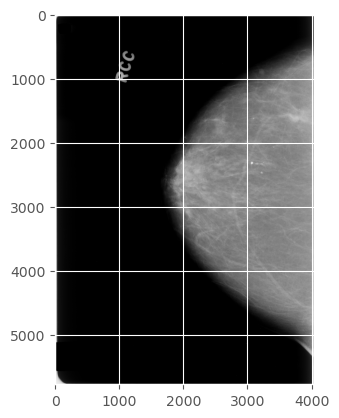

In [158]:
plt.imshow(array_of_images_test[0], cmap='gray')

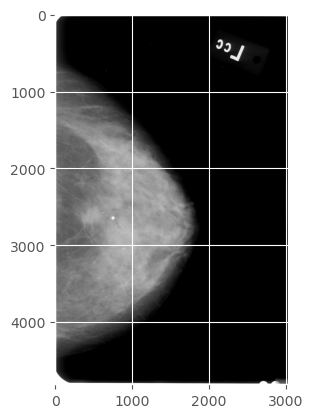

In [246]:
plt.imshow(array_of_images[0], cmap='gray')

In [88]:
roi_images_paths_test[6]

'/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.335564193512609498716387099372607181452/roi.jpg'

In [89]:
len(roi_images_paths_test)

378

In [50]:
roi_images_paths_test.head(10)

0    /Users/gryffindorgirl/Desktop/Internship/Kagge...
1    /Users/gryffindorgirl/Desktop/Internship/Kagge...
2    /Users/gryffindorgirl/Desktop/Internship/Kagge...
3    /Users/gryffindorgirl/Desktop/Internship/Kagge...
4    /Users/gryffindorgirl/Desktop/Internship/Kagge...
5    /Users/gryffindorgirl/Desktop/Internship/Kagge...
6    /Users/gryffindorgirl/Desktop/Internship/Kagge...
7    /Users/gryffindorgirl/Desktop/Internship/Kagge...
8    /Users/gryffindorgirl/Desktop/Internship/Kagge...
9    /Users/gryffindorgirl/Desktop/Internship/Kagge...
Name: ROI mask file path, dtype: object

In [90]:
array_of_roi_test = read_images_from_paths(roi_images_paths_test[200:])

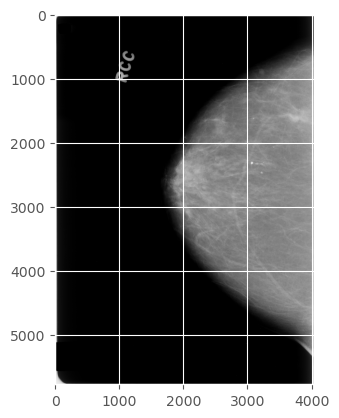

In [159]:
plt.imshow(array_of_images_test[0], cmap='gray')

In [206]:
array_of_roi = read_images_from_paths(roi_images_paths[1200:])

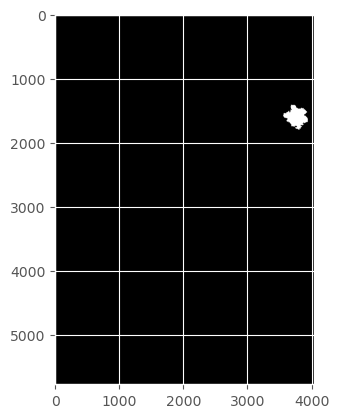

In [91]:
plt.imshow(array_of_roi_test[0], cmap='gray')

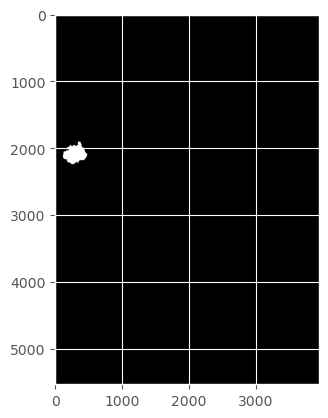

In [207]:
plt.imshow(array_of_roi[0], cmap='gray')

In [92]:
len(array_of_images_test)

178

In [93]:
len(array_of_roi_test)

178

In [62]:
# X_train = np.zeros(len(full_mammo_images_paths), im_height, im_width, 1), dtype=uint8)

In [63]:
# for n, id_ in tqdm_notebook(enumerate(full_mammo_images_paths), total=len(full_mammo_images_paths)):
#     # Load images
#     img = load_img("images/"+id_, grayscale=True)
#     x_img = img_to_array(img)
#     x_img = resize(x_img, (128, 128, 1), mode = 'constant', preserve_range = True)
#     # Load masks
#     mask = img_to_array(load_img("masks/"+id_, grayscale=True))
#     mask = resize(mask, (128, 128, 1), mode = 'constant', preserve_range = True)
#     Save images
#     X[n] = x_img/255.0
#     y[n] = mask/255.0

In [160]:
def cropBorders(img, l=0.01, r=0.01, u=0.04, d=0.04):

    nrows, ncols = img.shape

    # Get the start and end rows and columns
    l_crop = int(ncols * l)
    r_crop = int(ncols * (1 - r))
    u_crop = int(nrows * u)
    d_crop = int(nrows * (1 - d))

    cropped_img = img[u_crop:d_crop, l_crop:r_crop]

    return cropped_img

array_of_roi
array_of_images

In [63]:
# array_of_images = list(map(cropBorders, array_of_images))

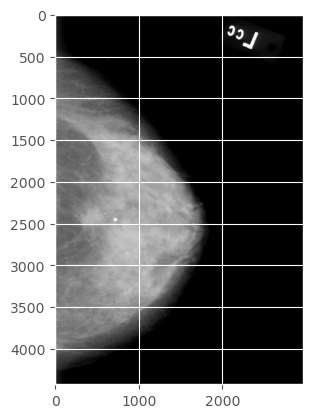

In [66]:
plt.imshow(array_of_images[0], cmap='gray')

In [64]:
# array_of_roi = list(map(cropBorders, array_of_roi))

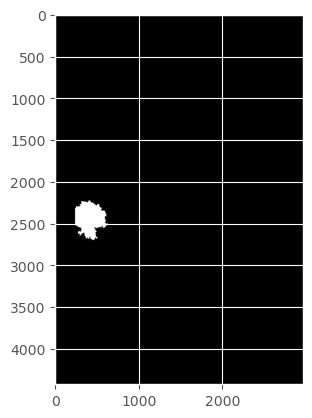

In [65]:
# plt.imshow(array_of_roi[0], cmap='gray')

In [161]:
def globalBinarise(img, thresh, maxval):

    binarised_img = np.zeros(img.shape, np.uint8)
    binarised_img[img >= thresh] = maxval

    return binarised_img

In [162]:
def editMask(mask, ksize=(23, 23), operation="open"):

    kernel = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=ksize)

    if operation == "open":
        edited_mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    elif operation == "close":
        edited_mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # Then dilate
    edited_mask = cv2.morphologyEx(edited_mask, cv2.MORPH_DILATE, kernel)

    return edited_mask

In [163]:
def sortContoursByArea(contours, reverse=True):

    # Sort contours based on contour area.
    sorted_contours = sorted(contours, key=cv2.contourArea, reverse=reverse)

    # Construct the list of corresponding bounding boxes.
    bounding_boxes = [cv2.boundingRect(c) for c in sorted_contours]

    return sorted_contours, bounding_boxes

In [164]:
def xLargestBlobs(mask, top_x=None, reverse=True):

    # Find all contours from binarised image.
    # Note: parts of the image that you want to get should be white.
    contours, hierarchy = cv2.findContours(
        image=mask, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE
    )

    n_contours = len(contours)

    # Only get largest blob if there is at least 1 contour.
    if n_contours > 0:

        # Make sure that the number of contours to keep is at most equal
        # to the number of contours present in the mask.
        if n_contours < top_x or top_x == None:
            top_x = n_contours

        # Sort contours based on contour area.
        sorted_contours, bounding_boxes = sortContoursByArea(
            contours=contours, reverse=reverse
        )

        # Get the top X largest contours.
        X_largest_contours = sorted_contours[0:top_x]

        # Create black canvas to draw contours on.
        to_draw_on = np.zeros(mask.shape, np.uint8)

        # Draw contours in X_largest_contours.
        X_largest_blobs = cv2.drawContours(
            image=to_draw_on,  # Draw the contours on `to_draw_on`.
            contours=X_largest_contours,  # List of contours to draw.
            contourIdx=-1,  # Draw all contours in `contours`.
            color=1,  # Draw the contours in white.
            thickness=-1,  # Thickness of the contour lines.
        )

    return n_contours, X_largest_blobs


In [165]:
def applyMask(img, mask):

    masked_img = img.copy()
    masked_img[mask == 0] = 0

    return masked_img

In [70]:
# binarised_img = globalBinarise(img=norm_img, thresh=thresh, maxval=maxval)
#         edited_mask = editMask(
#             mask=binarised_img, ksize=(ksize, ksize), operation=operation
#         )
#         _, xlargest_mask = xLargestBlobs(mask=edited_mask, top_x=top_x, reverse=reverse)
#         # cv2.imwrite(
#         # "../data/preprocessed/Mass/testing/xLargest_mask.png", xlargest_mask
#         # )
#         masked_img = applyMask(img=norm_img, mask=xlargest_mask)
#         # cv2.imwrite("../data/preprocessed/Mass/testing/masked_img.png", masked_img)

In [166]:
def checkLRFlip(mask):

    # Get number of rows and columns in the image.
    nrows, ncols = mask.shape
    x_center = ncols // 2
    y_center = nrows // 2

    # Sum down each column.
    col_sum = mask.sum(axis=0)
    # Sum across each row.
    row_sum = mask.sum(axis=1)

    left_sum = sum(col_sum[0:x_center])
    right_sum = sum(col_sum[x_center:-1])

    if left_sum < right_sum:
        LR_flip = True
    else:
        LR_flip = False

    return LR_flip


def makeLRFlip(img):

    flipped_img = np.fliplr(img)

    return flipped_img

In [167]:
def clahe(img, clip=2.0, tile=(8, 8)):

    img = cv2.normalize(
        img,
        None,
        alpha=0,
        beta=255,
        norm_type=cv2.NORM_MINMAX,
        dtype=cv2.CV_32F,
    )
    img_uint8 = img.astype("uint8")

    clahe_create = cv2.createCLAHE(clipLimit=clip, tileGridSize=tile)
    clahe_img = clahe_create.apply(img_uint8)

    return clahe_img

In [168]:

def pad(img):

    nrows, ncols = img.shape

    # If padding is required...
    if nrows != ncols:

        # Take the longer side as the target shape.
        if ncols < nrows:
            target_shape = (nrows, nrows)
        elif nrows < ncols:
            target_shape = (ncols, ncols)

        # pad.
        padded_img = np.zeros(shape=target_shape)
        padded_img[:nrows, :ncols] = img

    # If padding is not required...
    elif nrows == ncols:

        # Return original image.
        padded_img = img

    return padded_img

In [74]:
# config_imgPre = jsonref.load(open("imagePreprocessing.json"))

In [169]:
l = 0.01
r = 0.01
u = 0.04
d = 0.04
thresh = 0.1
maxval = 255
ksize = 23
operation = "open"
reverse = True
top_x = 1
clip = 2.0
tile = 8

In [170]:
cropped = cropBorders(img=array_of_images_test[0], l=l, r=r, d=d, u=u)

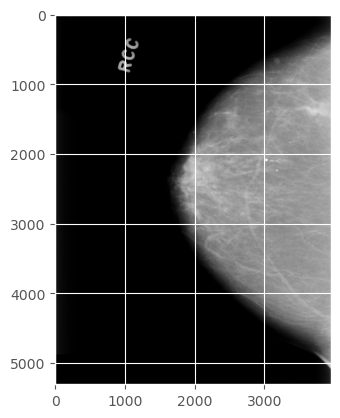

In [171]:
plt.imshow(cropped, cmap='gray')

In [172]:
binarisedImg = globalBinarise(img=cropped, thresh=thresh, maxval=maxval)

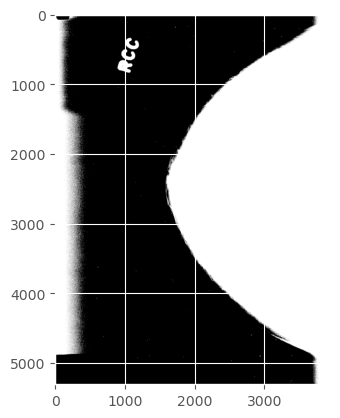

In [173]:
plt.imshow(binarisedImg, cmap='gray')

In [174]:
editedMask = editMask( mask=binarisedImg, ksize=(ksize, ksize), operation=operation )

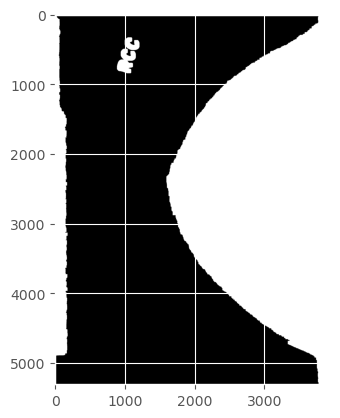

In [175]:
plt.imshow(editedMask, cmap='gray')

In [176]:
_, xlargestMask = xLargestBlobs(mask=editedMask, top_x=top_x, reverse=reverse)

In [177]:
_

4

In [178]:
xlargestMask

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=uint8)

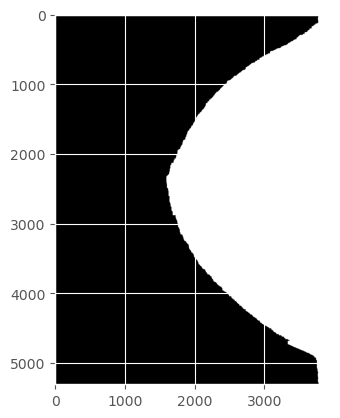

In [179]:
plt.imshow(xlargestMask, cmap='gray')

In [180]:
maskedImg = applyMask(img=cropped, mask=xlargestMask)

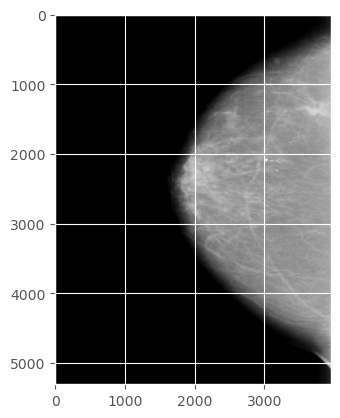

In [181]:
plt.imshow(maskedImg, cmap='gray')

In [182]:
lr_flip = checkLRFlip(mask=xlargestMask)
if lr_flip:
    flippedImg = makeLRFlip(img=maskedImg)
elif not lr_flip:
    flippedImg = maskedImg

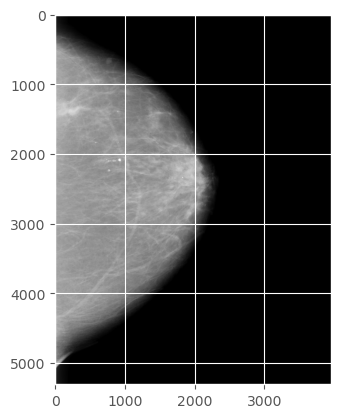

In [184]:
plt.imshow(flippedImg, cmap='gray')

In [185]:
claheImg = clahe(img=flippedImg, clip=clip, tile=(tile, tile))

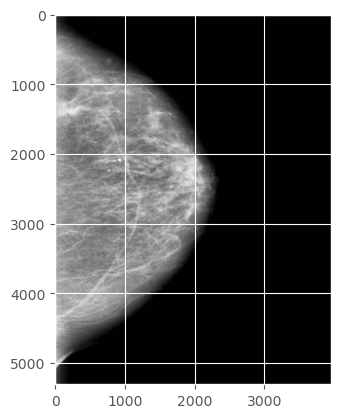

In [186]:
plt.imshow(claheImg, cmap='gray')

In [187]:
paddedImg = pad(img=claheImg)

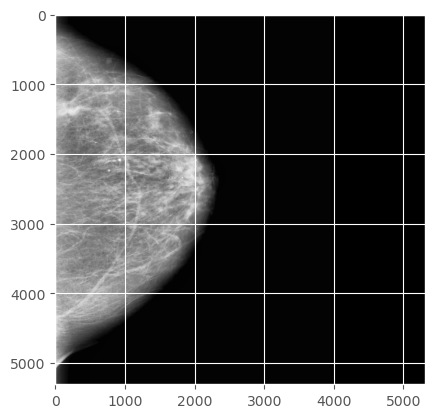

In [188]:
plt.imshow(paddedImg, cmap='gray')

In [189]:
paddedImg = cv2.normalize(
        paddedImg,
        None,
        alpha=0,
        beta=255,
        norm_type=cv2.NORM_MINMAX,
        dtype=cv2.CV_32F,
    )

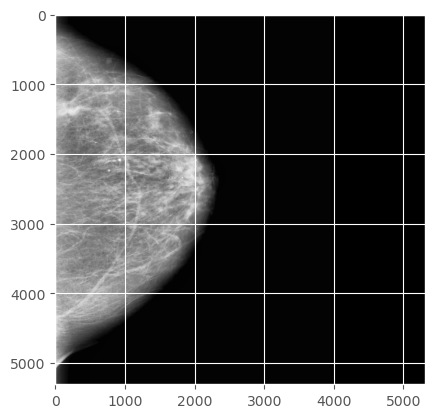

In [190]:
plt.imshow(paddedImg, cmap='gray')

In [69]:
def fullMammoPreprocess(
    img,
    l=l,
    r=r,
    u=u,
    d=d,
    thresh=thresh,
    maxval=maxval,
    ksize=ksize,
    operation=operation,
    reverse=reverse,
    top_x=top_x,
    clip=clip,
    tile=tile,
):

    # Step 1: Initial crop.
    cropped_img = cropBorders(img=img, l=l, r=r, d=d, u=u)

#     # Step 2: Min-max normalise.
#     norm_img = minMaxNormalise(img=cropped_img)

    # Step 3: Remove artefacts.
    binarised_img = globalBinarise(img=cropped_img, thresh=thresh, maxval=maxval)
    edited_mask = editMask(
        mask=binarised_img, ksize=(ksize, ksize), operation=operation
    )
    _, xlargest_mask = xLargestBlobs(mask=edited_mask, top_x=top_x, reverse=reverse)

    masked_img = applyMask(img=cropped_img, mask=xlargest_mask)

    # Step 4: Horizontal flip.
    lr_flip = checkLRFlip(mask=xlargest_mask)
    if lr_flip:
        flipped_img = makeLRFlip(img=masked_img)
    elif not lr_flip:
        flipped_img = masked_img

    # Step 5: CLAHE enhancement.
    clahe_img = clahe(img=flipped_img, clip=clip, tile=(tile, tile))

    # Step 6: pad.
    padded_img = pad(img=clahe_img)
    padded_img = cv2.normalize(
        padded_img,
        None,
        alpha=0,
        beta=255,
        norm_type=cv2.NORM_MINMAX,
        dtype=cv2.CV_32F,
    )


    return padded_img, lr_flip

In [77]:
# fullmamm_pre, lr_flip = fullMammoPreprocess(
#             img=fullmamm,
#             l=l,
#             r=r,
#             u=u,
#             d=d,
#             thresh=thresh,
#             maxval=maxval,
#             ksize=ksize,
#             operation=operation,
#             reverse=reverse,
#             top_x=top_x,
#             clip=clip,
#             tile=tile,
#         )

In [94]:
array_of_images_test = list(map(fullMammoPreprocess, array_of_images_test))

In [95]:
array_of_images_test[0][0]

array([[71., 74., 71., ...,  0.,  0.,  0.],
       [74., 74., 71., ...,  0.,  0.,  0.],
       [74., 74., 74., ...,  0.,  0.,  0.],
       ...,
       [84., 82., 81., ...,  0.,  0.,  0.],
       [84., 84., 82., ...,  0.,  0.,  0.],
       [84., 84., 84., ...,  0.,  0.,  0.]], dtype=float32)

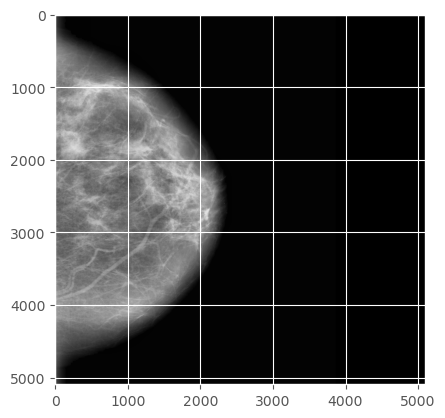

In [211]:
plt.imshow(array_of_images[0][0], cmap='gray')

In [96]:
list_1 = list()

In [97]:
for i in range(len(array_of_images_test)):
    list_1.append(array_of_images_test[i][1])

In [98]:
list_1

[True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 T

In [99]:
import json
with open('outputfileTest2.json', 'w') as fout:
    json.dump(list_1, fout)

In [100]:
len(array_of_images_test)

178

In [77]:
full_mammo_images_paths_test

0      /Users/gryffindorgirl/Desktop/Internship/Kagge...
1      /Users/gryffindorgirl/Desktop/Internship/Kagge...
2      /Users/gryffindorgirl/Desktop/Internship/Kagge...
3      /Users/gryffindorgirl/Desktop/Internship/Kagge...
4      /Users/gryffindorgirl/Desktop/Internship/Kagge...
                             ...                        
373    /Users/gryffindorgirl/Desktop/Internship/Kagge...
374    /Users/gryffindorgirl/Desktop/Internship/Kagge...
375    /Users/gryffindorgirl/Desktop/Internship/Kagge...
376    /Users/gryffindorgirl/Desktop/Internship/Kagge...
377    /Users/gryffindorgirl/Desktop/Internship/Kagge...
Name: image file path, Length: 378, dtype: object

In [101]:
for i in range(178):
    path = full_mammo_images_paths_test[i+200]
    image = array_of_images_test[i][0]
    res = [i for i in range(len(path)) if path.startswith("/", i)]
    idx_start = res[7]+1
    fileName = path[idx_start:]
    y = path.replace(fileName, 'full__pre.jpg')
    print(y)
    cv2.imwrite(y, image)

/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.79040702411772004907422243033911584465/full__pre.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.309442487611565870504132812100361660014/full__pre.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.1171337510424515733644328272589553771/full__pre.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.306729082811125941800587634072424887532/full__pre.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.120985041711985744633300778561327463509/full__pre.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.231418499611483562804956443353410908413/full__pre.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.231418499611483562804956443353410908413/full__pre.jpg
/Users/gryffindorgirl/D

/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.284816948411750963022363301570356728600/full__pre.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.146877317212333453834344894890577693516/full__pre.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.100632214012866120117337678502539182046/full__pre.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.114418132811537842711838788072789722154/full__pre.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.191721762511589361409478578201302211758/full__pre.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.184527952212663278031651160931758086446/full__pre.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.295013346213524930335568562470686281441/full__pre.jpg
/Users/gryffindorgir

/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.176197299412099100034183343550119515253/full__pre.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.116480947112670898133535663431673811690/full__pre.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.11842367811535029120579590633688930114/full__pre.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.199195778912558713817031507321459770006/full__pre.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.75697896410754715020619424620636529667/full__pre.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.351386294512687684821629395204182081789/full__pre.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.179488205110519665924920631250772597692/full__pre.jpg
/Users/gryffindorgirl/

In [102]:
full_mammo_images_paths_test[0]

'/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.245063149211255120613007755642780114172/full.jpg'

In [81]:
def maskPreprocess(mask, lr_flip):

    # Step 1: Initial crop.
    mask = cropBorders(img=mask)

    # Step 2: Horizontal flip.
    if lr_flip:
        mask = makeLRFlip(img=mask)

    # Step 3: Pad.
    mask_pre = pad(img=mask)

    return mask_pre

array_of_roi = 

In [103]:
for i in range(178):
    new_img = maskPreprocess(array_of_roi_test[i], list_1[i])
#     plt.imshow(array_of_roi[i], cmap='gray')
    path = roi_images_paths_test[i+200]
    res = [i for i in range(len(path)) if path.startswith("/", i)]
    idx_start = res[7]+1
    fileName = path[idx_start:]
    y = path.replace(fileName, 'roi__pre.jpg')
    print(y)
    cv2.imwrite(y, new_img)

/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.27482545913023369601220156280992196047/roi__pre.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.113512200013908794339480175931279083002/roi__pre.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.426384962513649626623228112721155143248/roi__pre.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.129334845213724994138804850432575672607/roi__pre.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.77212619711975684525779833721441146672/roi__pre.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.218188934811485655338580082221028304992/roi__pre.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.210650850013774158827926526882991110847/roi__pre.jpg
/Users/gryffindorgirl/Desktop

/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.211047614012920751420673079141493934140/roi__pre.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.219721745011726028715811032511378262407/roi__pre.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.226778768412401364103553176333766921754/roi__pre.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.195001099613037874842879740682250103497/roi__pre.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.189231448311754796912649145964069718784/roi__pre.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.309137596311103924008154031644268606037/roi__pre.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.228791419411326661400339683153067491414/roi__pre.jpg
/Users/gryffindorgirl/Deskt

/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.305608761311452355602792766720481770937/roi__pre.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.140943753610148655440492550530176201389/roi__pre.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.47192517012656234441691122440522246732/roi__pre.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.244922986413794324533068688833538680384/roi__pre.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.333945537913595541133242272012618859454/roi__pre.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.58380567113967993729178689602411895352/roi__pre.jpg
/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.154710156412596240610170136852613181245/roi__pre.jpg
/Users/gryffindorgirl/Desktop

In [ ]:
# save_filename = (
#             os.path.basename(fullmamm_path).replace(".dcm", "")
#             + "___PRE"
#             + output_format
#         )
#         save_path = os.path.join(output_full_path, save_filename)
#         cv2.imwrite(save_path, fullmamm_pre_norm)
#         print(f"DONE FULL: {fullmamm_path}")